In [1]:
from cobra.io import read_sbml_model
from cobra import Reaction, Metabolite
import pandas as pd
from cobra.flux_analysis import flux_variability_analysis

In [2]:
model = read_sbml_model('../data/iYO844_5htp.xml')

**Checking max 5-HTP production and respective growth rate if objective value is changed to the 5-HTP export reaction**

In [3]:
# Finding the flux of the phhA reaction
with model:
    print(model.reactions.DM_hydroxy_trp)
    model.objective = model.reactions.DM_hydroxy_trp
    solution = model.optimize()
    max_5HTP_production = solution.objective_value
    print("HTP flux", max_5HTP_production)
    print("Biomass flux", solution.fluxes.BIOMASS_BS_10)

DM_hydroxy_trp: hydroxy_trp --> 
HTP flux 0.5776145203111498
Biomass flux 0.0


**We can see here, that when we have optimal flux towards 5-HTP production, then there will be no flux towards biomass production, thus no growth of the cell.
Let's try and optimize for both 5-HTP and biomass production**

In [4]:
# Getting the flux towards 5-HTP and biomass respectively, when optimized for both reactions
with model:
    model.objective = {model.reactions.DM_hydroxy_trp: 0.5}
    solution = model.optimize()
    print("5-HTP flux", solution.objective_value)
   # model.objective = {model.reactions.BIOMASS_BS_10: 0.5}
   # solution = model.optimize()
    print("Biomass flux", solution.fluxes.BIOMASS_BS_10)

5-HTP flux 0.2888072601555749
Biomass flux 0.0


We can see here that the flux towards biomass and 5-HTP production are both half of their previous optimal flux, which make sense now that they share the flux

**Observing how the growth rate changes with increasing 5-HTP export flux**

In [3]:
from cobra.flux_analysis.phenotype_phase_plane import production_envelope

In [4]:
ppp_5HTP = production_envelope(model,
                    reactions=[model.reactions.DM_hydroxy_trp],
                    objective=model.reactions.BIOMASS_BS_10)

In [5]:
ppp_5HTP

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,DM_hydroxy_trp
0,EX_glc__D_e,0.0,0.0,NaN,0.117966,1.255696e+01,NaN,0.000000
1,EX_glc__D_e,0.0,0.0,NaN,0.111820,1.190272e+01,NaN,0.030401
2,EX_glc__D_e,0.0,0.0,NaN,0.105674,1.124848e+01,NaN,0.060802
3,EX_glc__D_e,0.0,0.0,NaN,0.099528,1.059423e+01,NaN,0.091202
4,EX_glc__D_e,0.0,0.0,NaN,0.093381,9.939991e+00,NaN,0.121603
5,EX_glc__D_e,0.0,0.0,NaN,0.087235,9.285750e+00,NaN,0.152004
6,EX_glc__D_e,0.0,0.0,NaN,0.081089,8.631508e+00,NaN,0.182405
7,EX_glc__D_e,0.0,0.0,NaN,0.074942,7.977266e+00,NaN,0.212805
8,EX_glc__D_e,0.0,0.0,NaN,0.068796,7.323024e+00,NaN,0.243206
9,EX_glc__D_e,0.0,0.0,NaN,0.062650,6.668782e+00,NaN,0.273607


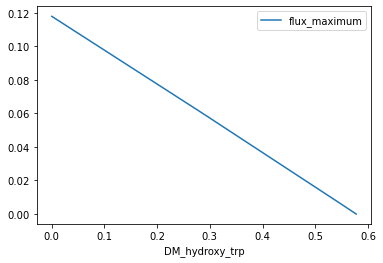

In [6]:
ppp_5HTP.plot(x='DM_hydroxy_trp', y='flux_maximum')

Not so good at all - we cannot get high flux towards 5-HTP without sacrificing the growth rate

In [7]:
hydroxy_trp_flux_analysis = flux_variability_analysis(model, model.reactions.DM_hydroxy_trp, fraction_of_optimum = 0.5)
print(hydroxy_trp_flux_analysis)

                minimum   maximum
DM_hydroxy_trp      0.0  0.291588


If we keep the growth rate at 50% of the maximum, we still can get around 52% of the max 5-HTP flux.

**Knocking out a single gene and setting the objective value of the model for 5-HTP export flux**

Only non-zero biomass production flux knock-outs are selected

In [5]:
for gene in model.genes:
    with model:
        gene.knock_out()
        model.objective = model.reactions.DM_hydroxy_trp
        solution = model.optimize()
        if solution.fluxes.BIOMASS_BS_10 > 0:
            print ('5-HTP export flux:', solution.fluxes.DM_hydroxy_trp, 'Gene ID:', gene.id, 'Biomass production:', solution.fluxes.BIOMASS_BS_10)

/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


No solutions are displayed, as in case of every knock-out and subsequent optimisation for max 5-HTP export no growth is observed.

**Knocking out a single gene, running optimisation for max biomass production flux and observing 5-HTP export flux**

Only non-zero 5-HTP export flux knock-outs are selected

In [13]:
knock_out_list = pd.DataFrame(columns=['Gene ID', '5-HTP export flux', 'Biomass production flux'])
pd.options.display.float_format = '{:,.4f}'.format
for gene in model.genes:
    with model:
        gene.knock_out()
        solution = model.optimize()
        if solution.fluxes.DM_hydroxy_trp > 0:
            knock_out_list = knock_out_list.append({ 'Gene ID': gene.id, '5-HTP export flux': solution.fluxes.DM_hydroxy_trp, 'Biomass production flux': model.optimize().objective_value}, ignore_index=True)

/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


In each and every case, either the growth rate or the 5-HTP export flux are very close to zero, so it can be concluded that no knock-outs would improve the 5-HTP flux

In [14]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
print(knock_out_list)

     Gene ID  5-HTP export flux  Biomass production flux
0   BSU35740 0.1659             0.0000                  
1   BSU22830 0.2183             0.0000                  
2   BSU00760 0.1991             0.0000                  
3   BSU00740 0.2017             -0.0000                 
4   BSU37150 0.2572             0.0000                  
5   BSU14190 0.2687             0.0000                  
6   BSU36900 0.2931             0.0000                  
7   BSU06520 0.5525             0.0000                  
8   BSU06420 0.2931             0.0000                  
9   BSU06430 0.2931             0.0000                  
10  BSU15680 0.2758             -0.0000                 
11  BSU21810 0.3400             -0.0000                 
12  BSU28080 0.3400             0.0000                  
13  BSU00780 0.3400             -0.0000                 
14  BSU15540 0.3400             -0.0000                 
15  BSU00770 0.2682             0.0000                  
16  BSU22750 0.0000            

<ipython-input-14-f4d78eb1eacc>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [9]:
#create list to store the reactions' IDs
carbon_uptake = list()

#go through all metabolites in the model that have carbon in their chem.structure
for metabolite in model.metabolites:
    if 'C' in metabolite.elements:
        #find metabolites that are external
        if metabolite.id[-1] == 'e':
            reactions = metabolite.reactions
            #pick reactions which exchange the metabolite with the external environment
            for element in reactions:
                if str(element.id[:2]) == 'EX':
                    carbon_uptake.append(element.id)

In [10]:
for reaction in carbon_uptake:
    print(reaction, "with the name: ", model.reactions.get_by_id(reaction).name)


EX_2ddglcn_e with the name:  2-Dehydro-3-deoxy-D-gluconate exchange
EX_2hxmp_e with the name:  2  Hydroxymethyl phenol exchange
EX_2pg_e with the name:  D Glycerate 2 phosphate exchange
EX_2pglyc_e with the name:  2 Phosphoglycolate exchange
EX_3amba_e with the name:  3 aminobutanoic acid exchange
EX_5mtr_e with the name:  5-Methylthio-D-ribose exchange
EX_3amp_e with the name:  3'-AMP exchange
EX_6pgc_e with the name:  6 Phospho D gluconate exchange
EX_3cmp_e with the name:  3'-cmp exchange
EX_3gmp_e with the name:  3'-GMP exchange
EX_ala_L_leu__L_e with the name:  Ala Leu exchange
EX_L_alagly_e with the name:  Ala L gly exchange
EX_Larab_e with the name:  Alpha L Arabinan exchange
EX_Lcyst_e with the name:  L-Cysteate exchange
EX_abt__L_e with the name:  L Arabinitol exchange
EX_alaala_e with the name:  D-Alanyl-D-alanine exchange
EX_alltn_e with the name:  Allantoin exchange
EX_ac_e with the name:  Acetate exchange
EX_3pg_e with the name:  3 Phospho D glycerate exchange
EX_acac_e wi

In [15]:
medium = model.medium

#replace glucose with each exchange reaction from the possible carbon source reactions
for reaction in carbon_uptake:
    medium = model.medium
    with model:
        medium['EX_glc__D_e'] = 0
        medium[reaction] = 10
        model.medium = medium
        model.objective = model.reactions.DM_hydroxy_trp
        solution = model.optimize()
        max_5HTP_production = solution.objective_value
        if solution.fluxes.BIOMASS_BS_10 > 0:
            print(solution.fluxes.BIOMASS_BS_10)
            print(max_5HTP_production)

/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/sit

In [16]:
model.medium

{'EX_fe3_e': 999999.0,
 'EX_glc__D_e': 1.7,
 'EX_ca2_e': 999999.0,
 'EX_so4_e': 5.0,
 'EX_co2_e': 999999.0,
 'EX_h2o_e': 999999.0,
 'EX_h_e': 999999.0,
 'EX_k_e': 999999.0,
 'EX_mg2_e': 999999.0,
 'EX_na1_e': 999999.0,
 'EX_nh4_e': 5.0,
 'EX_o2_e': 999999.0,
 'EX_pi_e': 5.0}

**Again working under the assumption that the production of 5-HTP and biomass needs to be shared 50-50, we will try and go through the list of potential carbon sources to see which carbon source will increase the flux towards both 5-HTP and biomass production.**

In [23]:
# getting the max fluxes of 5-htp and biomass production on glucose
medium = model.medium
model.objective = {model.reactions.DM_hydroxy_trp: 0.5}
solution = model.optimize()
glucose_max_5htp = solution.objective_value
model.objective = {model.reactions.BIOMASS_BS_10: 0.5}
solution = model.optimize()
glucose_max_biomass = solution.objective_value
count = 0

#replace glucose with each exchange reaction from the possible carbon source reactions
for reaction in carbon_uptake:
    # resetting the media after each change
    medium = model.medium
    with model:
        # setting the medium to the new carbon source
        medium['EX_glc__D_e'] = 0
        medium[reaction] = 1.7
        model.medium = medium
#        print(model.medium)
        # calculating max production of 5-htp and biomass
        model.objective = {model.reactions.DM_hydroxy_trp: 0.5} 
        solution = model.optimize()
        max_5HTP_production = solution.objective_value
        model.objective = {model.reactions.BIOMASS_BS_10: 0.5}
        solution = model.optimize()
        max_biomass_production = solution.objective_value
        # If the production is higher for both biomass and 5-htp production than using glucose as carbon source, then we print it
        if max_5HTP_production > glucose_max_5htp and max_biomass_production > glucose_max_biomass:
            count += 1
            print("optimal 5htp production using: ", model.reactions.get_by_id(reaction).name, "is ", max_5HTP_production)
            print("optimal biomass production using: ", model.reactions.get_by_id(reaction).name, "is ", max_biomass_production)
print("number of carbon sources which could improve 5-htp production: ", count)

/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  3'-AMP exchange is  0.37339999999999834
optimal biomass production using:  3'-AMP exchange is  0.07695335212247459
optimal 5htp production using:  3'-GMP exchange is  0.3488454706927197
optimal biomass production using:  3'-GMP exchange is  0.07135421638321539


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  Alpha L Arabinan exchange is  0.835800000000001
optimal biomass production using:  Alpha L Arabinan exchange is  0.17013312988360316


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  AMP exchange is  0.3734000000000003
optimal biomass production using:  AMP exchange is  0.0770026817470418
optimal 5htp production using:  N-Acetyl-D-glucosamine exchange is  0.37794117647058906
optimal biomass production using:  N-Acetyl-D-glucosamine exchange is  0.08036470351134299


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  N-Acetyl-D-mannosamine exchange is  0.4243589743589738
optimal biomass production using:  N-Acetyl-D-mannosamine exchange is  0.08672924578360475
optimal 5htp production using:  N-Acetylneuraminate exchange is  0.5902439024390261
optimal biomass production using:  N-Acetylneuraminate exchange is  0.12020204658873766
optimal 5htp production using:  Adenosine exchange is  0.3700000000000001
optimal biomass production using:  Adenosine exchange is  0.07615857266555953


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/sit

optimal 5htp production using:  D-fructose 6-phosphate exchange is  0.3027975133214923
optimal biomass production using:  D-fructose 6-phosphate exchange is  0.06134808689997349
optimal 5htp production using:  Deoxyadenosine exchange is  0.31874999999999937
optimal biomass production using:  Deoxyadenosine exchange is  0.07669414979625286
optimal 5htp production using:  Cellobiose exchange is  0.6554713804713709
optimal biomass production using:  Cellobiose exchange is  0.13465974630198468


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  Dextrin exchange is  0.6590000000000009
optimal biomass production using:  Dextrin exchange is  0.1338714488890575


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/sit

optimal 5htp production using:  D-Glucose 1-phosphate exchange is  0.3027975133214894
optimal biomass production using:  D-Glucose 1-phosphate exchange is  0.06134808689997423


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  D-Glucose 6-phosphate exchange is  0.30279751332149163
optimal biomass production using:  D-Glucose 6-phosphate exchange is  0.06134808689997356


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  Galactitol exchange is  0.3002704791344652
optimal biomass production using:  Galactitol exchange is  0.06426801618621555


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  D-Glucosamine 6-phosphate exchange is  0.3103463587921838
optimal biomass production using:  D-Glucosamine 6-phosphate exchange is  0.06300109917093821
optimal 5htp production using:  Glycogen exchange is  0.3065719360568375
optimal biomass production using:  Glycogen exchange is  0.062136384312904185


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  GMP exchange is  0.3691056910569108
optimal biomass production using:  GMP exchange is  0.07524219800746818
optimal 5htp production using:  Guanosine exchange is  0.34507104795737137
optimal biomass production using:  Guanosine exchange is  0.07055983414450354


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  Oxidized glutathione exchange is  0.4063829787234022
optimal biomass production using:  Oxidized glutathione exchange is  0.09103520426021765


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  Inosine exchange is  0.36659999999999987
optimal biomass production using:  Inosine exchange is  0.07525766649358387


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  D-Mannitol exchange is  0.3054000000000001
optimal biomass production using:  D-Mannitol exchange is  0.06450127655167325


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  Lactose exchange is  0.6477797513321464
optimal biomass production using:  Lactose exchange is  0.13150655665028294


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  Maltose exchange is  0.6624000000000004
optimal biomass production using:  Maltose exchange is  0.13465974630198424


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  Maltotriose exchange is  1.0296000000000003
optimal biomass production using:  Maltotriose exchange is  0.21033629794276923
optimal 5htp production using:  D Mannose 1 phosphate exchange is  0.3065719360568379
optimal biomass production using:  D Mannose 1 phosphate exchange is  0.062136384312899404
optimal 5htp production using:  D-Mannose 6-phosphate exchange is  0.30657193605683836
optimal biomass production using:  D-Mannose 6-phosphate exchange is  0.06213638431289922
optimal 5htp production using:  Melibiose exchange is  0.658999999999999
optimal biomass production using:  Melibiose exchange is  0.13387144888906016


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  Palatinose exchange is  0.6590000000000003
optimal biomass production using:  Palatinose exchange is  0.13387144888905958


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  Raffinose exchange is  1.0262000000000011
optimal biomass production using:  Raffinose exchange is  0.20954800052984685


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  Starch exchange is  0.6589999999999994
optimal biomass production using:  Starch exchange is  0.13387144888905844


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  D-Sorbitol exchange is  0.31412078152753053
optimal biomass production using:  D-Sorbitol exchange is  0.06371297913874865
optimal 5htp production using:  Sucrose exchange is  0.6488000000000006
optimal biomass production using:  Sucrose exchange is  0.1346597463019839


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  Xanthosine exchange is  0.3412966252220243
optimal biomass production using:  Xanthosine exchange is  0.06962322715842405


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  Trehalose exchange is  0.6488000000000054
optimal biomass production using:  Trehalose exchange is  0.13465974630198424


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


number of carbon sources which could improve 5-htp production:  35


## Yield calculations

**Calculating the max theoretical yeild of 5-HTP**

In [55]:
from cobra.flux_analysis import flux_variability_analysis

In [21]:
with model:
    # calculating max yield of 5-HTP
    model.objective = model.reactions.DM_hydroxy_trp
    max_5htp_production = model.optimize().objective_value
    substrate_flux = solution.fluxes['EX_glc__D_e']
    print("the flux of 5htp production: ",max_5htp_production , "[mmol gDW^-1 h^-1]")
    # calculating molar yield
    molar_yield_5htp = max_5htp_production / (-1. * substrate_flux)
    print("The molar yield of 5htp ", molar_yield_5htp, "[mmol-5htp / mmol-glc]")
    # Defining mass yield
    M_5htp = 0.22023 # g/mmol
    M_glc = 0.180156 # g/mmol
    mass_yield_5htp = max_5htp_production * M_5htp / (-1. * solution.fluxes['EX_glc__D_e'])*M_glc
    print("The mass yield of 5htp ", mass_yield_5htp , "[g-5htp / g-glc]")
    # calculating cmol yield
    # 5HTP: C11H12N2O3
    cmol_5htp = M_5htp/11
    # glucose: C6H12O6 
    cmol_glc = M_glc/6
    cmol_yield_5htp = mass_yield_5htp * (cmol_glc / cmol_5htp)
    print("The c-cmol yield of 5thp ", cmol_yield_5htp, "[cmol-5htp / cmol-glc]")
    

the flux of 5htp production:  0.5776145203111523 [mmol gDW^-1 h^-1]
The molar yield of 5htp  0.3397732472418543 [mmol-5htp / mmol-glc]
The mass yield of 5htp  0.013480760412122697 [g-5htp / g-glc]
The c-cmol yield of 5thp  0.02021752909902537 [cmol-5htp / cmol-glc]


In [27]:
medium = model.medium
with model:
    #replace glucose with glycerol
    medium['EX_glc__D_e'] = 0
    medium["EX_glyc_e"] = 1.7
    model.medium = medium
    model.objective = model.reactions.DM_hydroxy_trp
    solution = model.optimize()
    print("the flux of 5htp production: ",solution.fluxes["DM_hydroxy_trp"] , "[mmol gDW^-1 h^-1]")
    molar_yield_5htp = solution.fluxes['DM_hydroxy_trp'] / (-1. * solution.fluxes['EX_glyc_e'])
    print("The molar yield of 5htp ", molar_yield_5htp, "[mmol-5htp / mmol-glyc]")
    # calculating mass yield
    M_5htp = 220.23/1000 # g/mmol
    M_glyc = 92.09/1000 # g/mmol
    mass_yield_5htp = solution.fluxes['DM_hydroxy_trp']* M_5htp / (-1. * solution.fluxes['EX_glyc_e'])* M_glyc
    print("The mass yield of 5htp ", mass_yield_5htp , "[g-5htp / g-glyc]")
    # calculating cmol yield
    # 5HTP: C11H12N2O3
    cmol_5htp = M_5htp/11
    # glycerol: C3H8O3 
    cmol_glyc = M_glyc/3
    cmol_yield_5htp = mass_yield_5htp * (cmol_glyc / cmol_5htp)
    print("The c-cmol yield of 5thp ", cmol_yield_5htp, "[cmol-5htp / cmol-glyc]")

the flux of 5htp production:  0.2590090090090087 [mmol gDW^-1 h^-1]
The molar yield of 5htp  0.15235824059353453 [mmol-5htp / mmol-glyc]
The mass yield of 5htp  0.0030899745369634304 [g-5htp / g-glyc]
The c-cmol yield of 5thp  0.004737642928148733 [cmol-5htp / cmol-glyc]


**Calculating yield at 50% growth**

In [24]:
# Calculating the yield of 5-HTP and biomass on glucose carbon source
medium = model.medium

with model:
    # calculating flux towards 5-HTP production at 50% growth
    model.objective = {model.reactions.DM_hydroxy_trp: 0.5}
    solution = model.optimize()
    glucose_max_5htp = solution.objective_value
    substrate_flux = solution.fluxes['EX_glc__D_e']
    print("the flux of 5htp production: ",glucose_max_5htp, "[mmol gDW^-1 h^-1]")
    molar_yield_5htp = glucose_max_5htp / (-1. * substrate_flux)
    print("The molar yield of 5htp ", molar_yield_5htp, "[mmol-5htp / mmol-Sub]")
    # defining mass yield
    M_5htp = 220.23/1000 # g/mmol
    M_glc = 180.156/1000 # g/mmol
    glucose_mass_yield_5htp = glucose_max_5htp*M_5htp / (-1. * substrate_flux)*M_glc
    print("The mass yield of 5htp ", glucose_mass_yield_5htp , "[g-5htp / g-Sub]")
    # calculating cmol yield
    # 5HTP: C11H12N2O3
    cmol_5htp = M_5htp/11
    # glucose: C6H12O6 
    cmol_glc = M_glc/6
    cmol_yield_5htp = glucose_mass_yield_5htp * (cmol_glc / cmol_5htp)
    print("The c-cmol yield of 5thp ", cmol_yield_5htp, "[cmol-5htp / cmol-Sub]")
    # Calculating flux and yield of biomass
    model.objective = {model.reactions.BIOMASS_BS_10: 0.5}
    solution = model.optimize()
    glucose_max_biomass = solution.objective_value
    print("the flux of biomass production: ",glucose_max_biomass, "[mmol gDW^-1 h^-1]")
    molar_yield_biomass = glucose_max_biomass / (-1. * substrate_flux)
    print("The molar yield of biomass ", molar_yield_biomass, "[mmol-X / mmol-Sub]")
    # calculating mass yield
    # standard biomass CH1.8O0.5N0.2
    M_biomass = (12 + 1*1.8 + 16*0.5 + 14*0.2)/1000 # g/mmol
    glucose_mass_yield_biomass = glucose_max_biomass*M_biomass / (-1. * substrate_flux)*M_glc
    print("The mass yield of biomass ", glucose_mass_yield_biomass , "[g-X / g-Sub]")
    cmol_biomass = M_biomass/1
    cmol_yield_5htp = glucose_mass_yield_biomass * (cmol_glc / cmol_biomass)
    print("The c-cmol yield of biomass ", cmol_yield_5htp, "[cmol-X / cmol-Sub]")
    

the flux of 5htp production:  0.2888072601555745 [mmol gDW^-1 h^-1]
The molar yield of 5htp  0.16988662362092619 [mmol-5htp / mmol-Sub]
The mass yield of 5htp  0.0067403802060613085 [g-5htp / g-Sub]
The c-cmol yield of 5thp  0.010108764549512626 [cmol-5htp / cmol-Sub]
the flux of biomass production:  0.058983194661199466 [mmol gDW^-1 h^-1]
The molar yield of biomass  0.0346959968595291 [mmol-X / mmol-Sub]
The mass yield of biomass  0.00015376702345154297 [g-X / g-Sub]
The c-cmol yield of biomass  0.00018768327829902557 [cmol-X / cmol-Sub]


**Replace glucose with glycerol**

In [29]:
medium = model.medium

with model:
    #replace glucose with glycerol
    medium['EX_glc__D_e'] = 0
    medium["EX_glyc_e"] = 1.7
    model.medium = medium
    
    # calculating flux towards 5-HTP production at 50% growth
    model.objective = {model.reactions.DM_hydroxy_trp: 0.5}
    solution = model.optimize()
    hydroxy_trp_50 = solution.objective_value
    substrate_flux = solution.fluxes['EX_glyc_e']
    print("the flux of 5htp production: ",hydroxy_trp_50, "[mmol gDW^-1 h^-1]")
    molar_yield_5htp = hydroxy_trp_50 / (-1. * substrate_flux)
    print("The molar yield of 5htp ", molar_yield_5htp, "[mmol-5htp / mmol-Sub]")
    
    # calculating mass yield
    M_5htp = 220.23/1000 # g/mmol
    M_sub = 92.09/1000 # g/mmol
    mass_yield_5htp = hydroxy_trp_50*M_5htp / (-1. * substrate_flux)*M_sub
    print("The mass yield of 5htp ", mass_yield_5htp , "[g-5htp / g-Sub]")
    
    # calculating cmol yield
    # 5HTP: C11H12N2O3
    cmol_5htp = M_5htp/11
    # glycerol: C3H8O3 
    cmol_sub = M_sub/3
    cmol_yield_5htp = mass_yield_5htp * (cmol_sub / cmol_5htp)
    print("The c-cmol yield of 5thp ", cmol_yield_5htp, "[cmol-5htp / cmol-Sub]")
    
    # Calculating flux and yield of biomass
    model.objective = {model.reactions.BIOMASS_BS_10: 0.5}
    solution = model.optimize()
    biomass_50 = solution.objective_value
    print("the flux of biomass production: ",biomass_50, "[mmol gDW^-1 h^-1]")
    molar_yield_biomass = biomass_50 / (-1. * substrate_flux)
    print("The molar yield of biomass ", molar_yield_biomass, "[mmol-X / mmol-Sub]")
    
    # calculating mass yield
    # standard biomass CH1.8O0.5N0.2
    M_biomass = (12 + 1*1.8 + 16*0.5 + 14*0.2)/1000 # g/mmol
    mass_yield_biomass = biomass_50*M_biomass / (-1. * substrate_flux)*M_sub
    print("The mass yield of biomass ", mass_yield_biomass , "[g-X / g-Sub]")
    cmol_biomass = M_biomass/1
    cmol_yield_5htp = mass_yield_biomass * (cmol_sub / cmol_biomass)
    print("The c-cmol yield of biomass ", cmol_yield_5htp, "[cmol-X / cmol-Sub]")
    

the flux of 5htp production:  0.1295045045045031 [mmol gDW^-1 h^-1]
The molar yield of 5htp  0.07617912029676653 [mmol-5htp / mmol-Sub]
The mass yield of 5htp  0.0015449872684817002 [g-5htp / g-Sub]
The c-cmol yield of 5thp  0.0023688214640743433 [cmol-5htp / cmol-Sub]
the flux of biomass production:  0.02656657750328796 [mmol gDW^-1 h^-1]
The molar yield of biomass  0.01562739853134586 [mmol-X / mmol-Sub]
The mass yield of biomass  3.540252741649035e-05 [g-X / g-Sub]
The c-cmol yield of biomass  4.417640582363951e-05 [cmol-X / cmol-Sub]


**Replace glucose with sucrose**

In [28]:
medium = model.medium

with model:
    #replace glucose with sucrose
    medium['EX_glc__D_e'] = 0
    medium["EX_sucr_e"] = 1.7
    model.medium = medium
    
    # calculating flux towards 5-HTP production at 50% growth
    model.objective = {model.reactions.DM_hydroxy_trp: 0.5}
    solution = model.optimize()
    hydroxy_trp_50 = solution.objective_value
    substrate_flux = solution.fluxes['EX_sucr_e']
    print("the flux of 5htp production: ",hydroxy_trp_50, "[mmol gDW^-1 h^-1]")
    molar_yield_5htp = hydroxy_trp_50 / (-1. * substrate_flux)
    print("The molar yield of 5htp ", molar_yield_5htp, "[mmol-5htp / mmol-Sub]")
    
    # calculating mass yield
    M_5htp = 220.23/1000 # g/mmol
    # mass of sucrose
    M_sub = 342.29/1000 # g/mmol
    mass_yield_5htp = hydroxy_trp_50*M_5htp / (-1. * substrate_flux)*M_sub
    print("The mass yield of 5htp ", mass_yield_5htp , "[g-5htp / g-Sub]")
    
    # calculating cmol yield
    # 5HTP: C11H12N2O3
    cmol_5htp = M_5htp/11
    # sucrose: C12H22O11 
    cmol_sub = M_sub/12
    cmol_yield_5htp = mass_yield_5htp * (cmol_sub / cmol_5htp)
    print("The c-cmol yield of 5thp ", cmol_yield_5htp, "[cmol-5htp / cmol-Sub]")
    
    # Calculating flux and yield of biomass
    model.objective = {model.reactions.BIOMASS_BS_10: 0.5}
    solution = model.optimize()
    biomass_50 = solution.objective_value
    print("the flux of biomass production: ",biomass_50, "[mmol gDW^-1 h^-1]")
    molar_yield_biomass = biomass_50 / (-1. * substrate_flux)
    print("The molar yield of biomass ", molar_yield_biomass, "[mmol-X / mmol-Sub]")
    
    # calculating mass yield
    # standard biomass CH1.8O0.5N0.2
    M_biomass = (12 + 1*1.8 + 16*0.5 + 14*0.2)/1000 # g/mmol
    mass_yield_biomass = biomass_50*M_biomass / (-1. * substrate_flux)*M_sub
    print("The mass yield of biomass ", mass_yield_biomass , "[g-X / g-Sub]")
    cmol_biomass = M_biomass/1
    cmol_yield_5htp = mass_yield_biomass * (cmol_sub / cmol_biomass)
    print("The c-cmol yield of biomass ", cmol_yield_5htp, "[cmol-X / cmol-Sub]")
    

the flux of 5htp production:  0.6488000000000002 [mmol gDW^-1 h^-1]
The molar yield of 5htp  0.3816470588235295 [mmol-5htp / mmol-Sub]
The mass yield of 5htp  0.02876951960174119 [g-5htp / g-Sub]
The c-cmol yield of 5thp  0.04098847701239611 [cmol-5htp / cmol-Sub]
the flux of biomass production:  0.13465974630198455 [mmol gDW^-1 h^-1]
The molar yield of biomass  0.07921161547175562 [mmol-X / mmol-Sub]
The mass yield of biomass  0.00066698825895175 [g-X / g-Sub]
The c-cmol yield of biomass  0.0007733855391483554 [cmol-X / cmol-Sub]


**Replace glucose with lactose**

In [30]:
medium = model.medium

with model:
    #replace glucose with lactose
    medium['EX_glc__D_e'] = 0
    medium["EX_lcts_e"] = 1.7
    model.medium = medium
    
    # calculating flux towards 5-HTP production at 50% growth
    model.objective = {model.reactions.DM_hydroxy_trp: 0.5}
    solution = model.optimize()
    hydroxy_trp_50 = solution.objective_value
    substrate_flux = solution.fluxes['EX_lcts_e']
    print("the flux of 5htp production: ",hydroxy_trp_50, "[mmol gDW^-1 h^-1]")
    molar_yield_5htp = hydroxy_trp_50 / (-1. * substrate_flux)
    print("The molar yield of 5htp ", molar_yield_5htp, "[mmol-5htp / mmol-Sub]")
    
    # calculating mass yield
    M_5htp = 220.23/1000 # g/mmol
    # mass of lactose
    M_sub = 342.3/1000 # g/mmol
    mass_yield_5htp = hydroxy_trp_50*M_5htp / (-1. * substrate_flux)*M_sub
    print("The mass yield of 5htp ", mass_yield_5htp , "[g-5htp / g-Sub]")
    
    # calculating cmol yield
    # 5HTP: C11H12N2O3
    cmol_5htp = M_5htp/11
    # lactose: C12H22O11 
    cmol_sub = M_sub/12
    cmol_yield_5htp = mass_yield_5htp * (cmol_sub / cmol_5htp)
    print("The c-cmol yield of 5thp ", cmol_yield_5htp, "[cmol-5htp / cmol-Sub]")
    
    # Calculating flux and yield of biomass
    model.objective = {model.reactions.BIOMASS_BS_10: 0.5}
    solution = model.optimize()
    biomass_50 = solution.objective_value
    print("the flux of biomass production: ",biomass_50, "[mmol gDW^-1 h^-1]")
    molar_yield_biomass = biomass_50 / (-1. * substrate_flux)
    print("The molar yield of biomass ", molar_yield_biomass, "[mmol-X / mmol-Sub]")
    
    # calculating mass yield
    # standard biomass CH1.8O0.5N0.2
    M_biomass = (12 + 1*1.8 + 16*0.5 + 14*0.2)/1000 # g/mmol
    mass_yield_biomass = biomass_50*M_biomass / (-1. * substrate_flux)*M_sub
    print("The mass yield of biomass ", mass_yield_biomass , "[g-X / g-Sub]")
    cmol_biomass = M_biomass/1
    cmol_yield_5htp = mass_yield_biomass * (cmol_sub / cmol_biomass)
    print("The c-cmol yield of biomass ", cmol_yield_5htp, "[cmol-X / cmol-Sub]")
    

the flux of 5htp production:  0.6477797513321562 [mmol gDW^-1 h^-1]
The molar yield of 5htp  0.3810469125483272 [mmol-5htp / mmol-Sub]
The mass yield of 5htp  0.028725118238742343 [g-5htp / g-Sub]
The c-cmol yield of 5thp  0.04092641318331462 [cmol-5htp / cmol-Sub]
the flux of biomass production:  0.1315065566502862 [mmol gDW^-1 h^-1]
The molar yield of biomass  0.07735679802958012 [mmol-X / mmol-Sub]
The mass yield of biomass  0.0006513891063519218 [g-X / g-Sub]
The c-cmol yield of biomass  0.0007553200918166084 [cmol-X / cmol-Sub]


**Replace glucose with galactose**

In [31]:
medium = model.medium

with model:
    #replace glucose with lactose
    medium['EX_glc__D_e'] = 0
    medium["EX_gal_e"] = 1.7
    model.medium = medium
    
    # calculating flux towards 5-HTP production at 50% growth
    model.objective = {model.reactions.DM_hydroxy_trp: 0.5}
    solution = model.optimize()
    hydroxy_trp_50 = solution.objective_value
    substrate_flux = solution.fluxes['EX_gal_e']
    print("the flux of 5htp production: ",hydroxy_trp_50, "[mmol gDW^-1 h^-1]")
    molar_yield_5htp = hydroxy_trp_50 / (-1. * substrate_flux)
    print("The molar yield of 5htp ", molar_yield_5htp, "[mmol-5htp / mmol-Sub]")
    
    # calculating mass yield
    M_5htp = 220.23/1000 # g/mmol
    # mass of galactose
    M_sub = 180.16/1000 # g/mmol
    mass_yield_5htp = hydroxy_trp_50*M_5htp / (-1. * substrate_flux)*M_sub
    print("The mass yield of 5htp ", mass_yield_5htp , "[g-5htp / g-Sub]")
    
    # calculating cmol yield
    # 5HTP: C11H12N2O3
    cmol_5htp = M_5htp/11
    # galactose: C6H12O6 
    cmol_sub = M_sub/12
    cmol_yield_5htp = mass_yield_5htp * (cmol_sub / cmol_5htp)
    print("The c-cmol yield of 5thp ", cmol_yield_5htp, "[cmol-5htp / cmol-Sub]")
    
    # Calculating flux and yield of biomass
    model.objective = {model.reactions.BIOMASS_BS_10: 0.5}
    solution = model.optimize()
    biomass_50 = solution.objective_value
    print("the flux of biomass production: ",biomass_50, "[mmol gDW^-1 h^-1]")
    molar_yield_biomass = biomass_50 / (-1. * substrate_flux)
    print("The molar yield of biomass ", molar_yield_biomass, "[mmol-X / mmol-Sub]")
    
    # calculating mass yield
    # standard biomass CH1.8O0.5N0.2
    M_biomass = (12 + 1*1.8 + 16*0.5 + 14*0.2)/1000 # g/mmol
    mass_yield_biomass = biomass_50*M_biomass / (-1. * substrate_flux)*M_sub
    print("The mass yield of biomass ", mass_yield_biomass , "[g-X / g-Sub]")
    cmol_biomass = M_biomass/1
    cmol_yield_5htp = mass_yield_biomass * (cmol_sub / cmol_biomass)
    print("The c-cmol yield of biomass ", cmol_yield_5htp, "[cmol-X / cmol-Sub]")
    

the flux of 5htp production:  0.28769982238010666 [mmol gDW^-1 h^-1]
The molar yield of 5htp  0.16923518963535686 [mmol-5htp / mmol-Sub]
The mass yield of 5htp  0.006714683152941178 [g-5htp / g-Sub]
The c-cmol yield of 5thp  0.005035224721568628 [cmol-5htp / cmol-Sub]
the flux of biomass production:  0.058194897248275985 [mmol gDW^-1 h^-1]
The molar yield of biomass  0.03423229249898588 [mmol-X / mmol-Sub]
The mass yield of biomass  0.00015171532948878545 [g-X / g-Sub]
The c-cmol yield of biomass  9.259157778014764e-05 [cmol-X / cmol-Sub]


**Replace glucose with Fructose**

In [32]:
medium = model.medium

with model:
    #replace glucose with fructose
    medium['EX_glc__D_e'] = 0
    medium["EX_fru_e"] = 1.7
    model.medium = medium
    
    # calculating flux towards 5-HTP production at 50% growth
    model.objective = {model.reactions.DM_hydroxy_trp: 0.5}
    solution = model.optimize()
    hydroxy_trp_50 = solution.objective_value
    substrate_flux = solution.fluxes['EX_fru_e']
    print("the flux of 5htp production: ",hydroxy_trp_50, "[mmol gDW^-1 h^-1]")
    molar_yield_5htp = hydroxy_trp_50 / (-1. * substrate_flux)
    print("The molar yield of 5htp ", molar_yield_5htp, "[mmol-5htp / mmol-Sub]")
    
    # calculating mass yield
    M_5htp = 220.23/1000 # g/mmol
    # mass of fructose
    M_sub = 180.16/1000 # g/mmol
    mass_yield_5htp = hydroxy_trp_50*M_5htp / (-1. * substrate_flux)*M_sub
    print("The mass yield of 5htp ", mass_yield_5htp , "[g-5htp / g-Sub]")
    
    # calculating cmol yield
    # 5HTP: C11H12N2O3
    cmol_5htp = M_5htp/11
    # fructose: C6H12O6 
    cmol_sub = M_sub/12
    cmol_yield_5htp = mass_yield_5htp * (cmol_sub / cmol_5htp)
    print("The c-cmol yield of 5thp ", cmol_yield_5htp, "[cmol-5htp / cmol-Sub]")
    
    # Calculating flux and yield of biomass
    model.objective = {model.reactions.BIOMASS_BS_10: 0.5}
    solution = model.optimize()
    biomass_50 = solution.objective_value
    print("the flux of biomass production: ",biomass_50, "[mmol gDW^-1 h^-1]")
    molar_yield_biomass = biomass_50 / (-1. * substrate_flux)
    print("The molar yield of biomass ", molar_yield_biomass, "[mmol-X / mmol-Sub]")
    
    # calculating mass yield
    # standard biomass CH1.8O0.5N0.2
    M_biomass = (12 + 1*1.8 + 16*0.5 + 14*0.2)/1000 # g/mmol
    mass_yield_biomass = biomass_50*M_biomass / (-1. * substrate_flux)*M_sub
    print("The mass yield of biomass ", mass_yield_biomass , "[g-X / g-Sub]")
    cmol_biomass = M_biomass/1
    cmol_yield_5htp = mass_yield_biomass * (cmol_sub / cmol_biomass)
    print("The c-cmol yield of biomass ", cmol_yield_5htp, "[cmol-X / cmol-Sub]")
    

the flux of 5htp production:  0.27685950413223176 [mmol gDW^-1 h^-1]
The molar yield of 5htp  0.16285853184248927 [mmol-5htp / mmol-Sub]
The mass yield of 5htp  0.0064616788176956805 [g-5htp / g-Sub]
The c-cmol yield of 5thp  0.004845501147950094 [cmol-5htp / cmol-Sub]
the flux of biomass production:  0.058769889711620615 [mmol gDW^-1 h^-1]
The molar yield of biomass  0.03457052335977683 [mmol-X / mmol-Sub]
The mass yield of biomass  0.0001532143470170359 [g-X / g-Sub]
The c-cmol yield of biomass  9.350642533397419e-05 [cmol-X / cmol-Sub]


# Creating and simulating a DFBA model


**Just glucose in the media**

In [2]:
from cobra.io import read_sbml_model
import pandas as pd
from os.path import dirname, join, pardir
from dfba import DfbaModel, ExchangeFlux, KineticVariable
from cobra.flux_analysis import flux_variability_analysis
from dfba.plot.plotly import *
from dfba.plot.matplotlib import *

In [3]:
model = read_sbml_model('../data/iYO844_5htp.xml')

In [4]:
with model:
    model.objective = model.reactions.BIOMASS_BS_10
    bio_objective = model.optimize().objective_value

In [5]:
# Defining model
fba_model = model
# Adding lower bound for biomass
fba_model.reactions.BIOMASS_BS_10.lower_bound = bio_objective * 0.5
# Changing objective to 5HTP production
fba_model.objective = "DM_hydroxy_trp"
fba_model.solver = "glpk"
dfba_model = DfbaModel(fba_model)

In [6]:
X = KineticVariable("Biomass")
HTP = KineticVariable("5HTP")
Gluc = KineticVariable("Glucose")
Oxy = KineticVariable("Oxygen")

dfba_model.add_kinetic_variables([X, HTP, Gluc, Oxy])

In [9]:
# Exchange fluxes
mu_bio = ExchangeFlux("BIOMASS_BS_10")
v_htp = ExchangeFlux("DM_hydroxy_trp")
v_GL = ExchangeFlux("EX_glc__D_e")
v_O = ExchangeFlux("EX_o2_e")


dfba_model.add_exchange_fluxes([mu_bio, v_htp, v_GL, v_O])

In [10]:
# Rhs expressions
dfba_model.add_rhs_expression("Biomass", mu_bio * X)
dfba_model.add_rhs_expression("5HTP", v_htp * 220.23/1000 * X)
dfba_model.add_rhs_expression("Glucose", v_GL * 180.1559/1000 * X) # v_GL [mmol gDW^-1 h^-1] * 0.18 g/mmol * gDW/L
dfba_model.add_rhs_expression("Oxygen", 0) # O2 is kept constant

In [11]:
# Adding bounds for oxygen
vmax_o2 = 15 # [mmol gDW^-1 h^-1]
Ko = 0.024 # mmol/L O2 Michaelis-Mentent constant
dfba_model.add_exchange_flux_lb("EX_o2_e", vmax_o2 * (Oxy / (Ko + Oxy)), Oxy)

In [21]:
# Adding bounds for glucose
vmax_glc = 13.1 # [mmol gDW^-1 h^-1] 
Kg = 0.9 # g/L Glucose Michaelis-Menten constant #[Wagner et al., 2000]
dfba_model.add_exchange_flux_lb("EX_glc__D_e", vmax_glc * (Gluc / (Kg + Gluc)), Gluc)

#Wagner, A., Kuster-Schock, E., & Hillen, W. (2000). Sugar uptake and carbon catabolite repression in Bacillus megaterium strains with inactivated ptsHI. Journal of Molecular Microbiology and Biotechnology, 2(4), 587–592.

In [22]:
# add initial conditions and launch simulation
dfba_model.add_initial_conditions(
    {
        "Biomass": 0.01, # (gDW/L)
        "5HTP": 0.00, # (gDW/L)
        "Glucose": 22.0, # (g/L)   [Kopp et al. 2018]
        "Oxygen": 0.24,  # (mmol/L)
    }
)
concentrations, trajectories = dfba_model.simulate(0.0, 80.0, 0.1, ["EX_glc__D_e","DM_hydroxy_trp"])

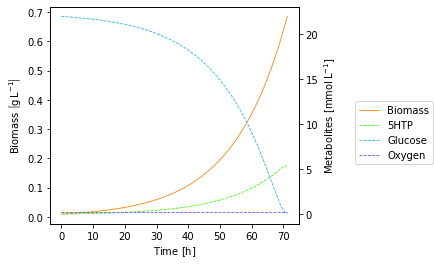

In [23]:
plot_concentrations(concentrations)